In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 128.")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=100, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16768     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 19,993
Trainable params: 19,993
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
4/5 [=======================>......] - ETA: 0s - loss: 1.2821 - mae: 0.9860INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 641ms/step - loss: 1.2252 - mae: 0.9572 - val_loss: 0.6291 - val_mae: 0.6476
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.4838 - mae: 0.5559INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.4838 - mae: 0.5559 - val_loss: 0.2325 - val_mae: 0.3888
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.2082 - mae: 0.3725INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 511ms/step - loss: 0.2082 - mae: 0.3725 - val_loss: 0.1781 - val_mae: 0.3468
Epoch 4/100
4/5 [=======================>......] - ETA: 0s - loss: 0.1767 - mae: 0.3413INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 532ms/step - loss: 0.1767 - mae: 0.3411 - val_loss: 0.1472 - val_mae: 0.3108
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.1373 - mae: 0.2992INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.1373 - mae: 0.2992 - val_loss: 0.1058 - val_mae: 0.2579
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.1001 - mae: 0.2513INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.1001 - mae: 0.2513 - val_loss: 0.0980 - val_mae: 0.2457
Epoch 7/100
5/5 [==============================] - ETA: 0s - loss: 0.0893 - mae: 0.2343INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0893 - mae: 0.2343 - val_loss: 0.0798 - val_mae: 0.2235
Epoch 8/100
5/5 [==============================] - ETA: 0s - loss: 0.0786 - mae: 0.2217INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0786 - mae: 0.2217 - val_loss: 0.0697 - val_mae: 0.2086
Epoch 9/100
5/5 [==============================] - ETA: 0s - loss: 0.0754 - mae: 0.2181INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 525ms/step - loss: 0.0754 - mae: 0.2181 - val_loss: 0.0675 - val_mae: 0.2044
Epoch 10/100
5/5 [==============================] - 1s 169ms/step - loss: 0.0708 - mae: 0.2115 - val_loss: 0.0728 - val_mae: 0.2091
Epoch 11/100
5/5 [==============================] - ETA: 0s - loss: 0.0678 - mae: 0.2044INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0678 - mae: 0.2044 - val_loss: 0.0617 - val_mae: 0.1932
Epoch 12/100
5/5 [==============================] - ETA: 0s - loss: 0.0644 - mae: 0.1987INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 531ms/step - loss: 0.0644 - mae: 0.1987 - val_loss: 0.0605 - val_mae: 0.1921
Epoch 13/100
5/5 [==============================] - 1s 153ms/step - loss: 0.0636 - mae: 0.1991 - val_loss: 0.0607 - val_mae: 0.1903
Epoch 14/100
5/5 [==============================] - 1s 154ms/step - loss: 0.0630 - mae: 0.1984 - val_loss: 0.0646 - val_mae: 0.1951
Epoch 15/100
5/5 [==============================] - 1s 149ms/step - loss: 0.0618 - mae: 0.1944 - val_loss: 0.0654 - val_mae: 0.1964
Epoch 16/100
5/5 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.1922INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0609 - mae: 0.1922 - val_loss: 0.0581 - val_mae: 0.1857
Epoch 17/100
5/5 [==============================] - ETA: 0s - loss: 0.0575 - mae: 0.1860INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 534ms/step - loss: 0.0575 - mae: 0.1860 - val_loss: 0.0563 - val_mae: 0.1854
Epoch 18/100
5/5 [==============================] - ETA: 0s - loss: 0.0565 - mae: 0.1849INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0565 - mae: 0.1849 - val_loss: 0.0555 - val_mae: 0.1832
Epoch 19/100
5/5 [==============================] - 1s 160ms/step - loss: 0.0553 - mae: 0.1831 - val_loss: 0.0555 - val_mae: 0.1813
Epoch 20/100
5/5 [==============================] - ETA: 0s - loss: 0.0539 - mae: 0.1800INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 579ms/step - loss: 0.0539 - mae: 0.1800 - val_loss: 0.0536 - val_mae: 0.1791
Epoch 21/100
5/5 [==============================] - 1s 173ms/step - loss: 0.0552 - mae: 0.1814 - val_loss: 0.0634 - val_mae: 0.2036
Epoch 22/100
5/5 [==============================] - ETA: 0s - loss: 0.0635 - mae: 0.1985INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0635 - mae: 0.1985 - val_loss: 0.0536 - val_mae: 0.1806
Epoch 23/100
5/5 [==============================] - 1s 174ms/step - loss: 0.0587 - mae: 0.1906 - val_loss: 0.0610 - val_mae: 0.1908
Epoch 24/100
5/5 [==============================] - ETA: 0s - loss: 0.0552 - mae: 0.1832INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0552 - mae: 0.1832 - val_loss: 0.0524 - val_mae: 0.1748
Epoch 25/100
5/5 [==============================] - 1s 128ms/step - loss: 0.0545 - mae: 0.1804 - val_loss: 0.0536 - val_mae: 0.1835
Epoch 26/100
5/5 [==============================] - ETA: 0s - loss: 0.0536 - mae: 0.1795INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 456ms/step - loss: 0.0536 - mae: 0.1795 - val_loss: 0.0502 - val_mae: 0.1747
Epoch 27/100
5/5 [==============================] - 1s 152ms/step - loss: 0.0499 - mae: 0.1738 - val_loss: 0.0512 - val_mae: 0.1733
Epoch 28/100
5/5 [==============================] - ETA: 0s - loss: 0.0479 - mae: 0.1684INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0479 - mae: 0.1684 - val_loss: 0.0481 - val_mae: 0.1710
Epoch 29/100
5/5 [==============================] - ETA: 0s - loss: 0.0474 - mae: 0.1677INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0474 - mae: 0.1677 - val_loss: 0.0470 - val_mae: 0.1670
Epoch 30/100
5/5 [==============================] - 1s 162ms/step - loss: 0.0456 - mae: 0.1650 - val_loss: 0.0473 - val_mae: 0.1661
Epoch 31/100
5/5 [==============================] - ETA: 0s - loss: 0.0442 - mae: 0.1612INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 520ms/step - loss: 0.0442 - mae: 0.1612 - val_loss: 0.0463 - val_mae: 0.1691
Epoch 32/100
5/5 [==============================] - ETA: 0s - loss: 0.0449 - mae: 0.1626INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0449 - mae: 0.1626 - val_loss: 0.0435 - val_mae: 0.1612
Epoch 33/100
5/5 [==============================] - 1s 154ms/step - loss: 0.0427 - mae: 0.1590 - val_loss: 0.0442 - val_mae: 0.1605
Epoch 34/100
5/5 [==============================] - ETA: 0s - loss: 0.0416 - mae: 0.1562INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0416 - mae: 0.1562 - val_loss: 0.0413 - val_mae: 0.1578
Epoch 35/100
5/5 [==============================] - ETA: 0s - loss: 0.0404 - mae: 0.1531INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0404 - mae: 0.1531 - val_loss: 0.0405 - val_mae: 0.1578
Epoch 36/100
5/5 [==============================] - ETA: 0s - loss: 0.0387 - mae: 0.1515INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 514ms/step - loss: 0.0387 - mae: 0.1515 - val_loss: 0.0391 - val_mae: 0.1544
Epoch 37/100
5/5 [==============================] - ETA: 0s - loss: 0.0373 - mae: 0.1484INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0373 - mae: 0.1484 - val_loss: 0.0389 - val_mae: 0.1522
Epoch 38/100
5/5 [==============================] - ETA: 0s - loss: 0.0359 - mae: 0.1452INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 478ms/step - loss: 0.0359 - mae: 0.1452 - val_loss: 0.0367 - val_mae: 0.1499
Epoch 39/100
5/5 [==============================] - ETA: 0s - loss: 0.0347 - mae: 0.1436INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0347 - mae: 0.1436 - val_loss: 0.0352 - val_mae: 0.1471
Epoch 40/100
5/5 [==============================] - ETA: 0s - loss: 0.0331 - mae: 0.1405INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0331 - mae: 0.1405 - val_loss: 0.0347 - val_mae: 0.1445
Epoch 41/100
5/5 [==============================] - ETA: 0s - loss: 0.0322 - mae: 0.1376INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0322 - mae: 0.1376 - val_loss: 0.0333 - val_mae: 0.1428
Epoch 42/100
5/5 [==============================] - ETA: 0s - loss: 0.0310 - mae: 0.1354INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0310 - mae: 0.1354 - val_loss: 0.0325 - val_mae: 0.1426
Epoch 43/100
5/5 [==============================] - ETA: 0s - loss: 0.0299 - mae: 0.1343INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0299 - mae: 0.1343 - val_loss: 0.0313 - val_mae: 0.1396
Epoch 44/100
5/5 [==============================] - ETA: 0s - loss: 0.0288 - mae: 0.1316INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0288 - mae: 0.1316 - val_loss: 0.0310 - val_mae: 0.1383
Epoch 45/100
5/5 [==============================] - ETA: 0s - loss: 0.0280 - mae: 0.1301INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 518ms/step - loss: 0.0280 - mae: 0.1301 - val_loss: 0.0289 - val_mae: 0.1342
Epoch 46/100
5/5 [==============================] - ETA: 0s - loss: 0.0265 - mae: 0.1264INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0265 - mae: 0.1264 - val_loss: 0.0281 - val_mae: 0.1325
Epoch 47/100
5/5 [==============================] - ETA: 0s - loss: 0.0258 - mae: 0.1248INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 0.0258 - mae: 0.1248 - val_loss: 0.0277 - val_mae: 0.1311
Epoch 48/100
5/5 [==============================] - ETA: 0s - loss: 0.0250 - mae: 0.1225INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 539ms/step - loss: 0.0250 - mae: 0.1225 - val_loss: 0.0256 - val_mae: 0.1260
Epoch 49/100
5/5 [==============================] - ETA: 0s - loss: 0.0236 - mae: 0.1195INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0236 - mae: 0.1195 - val_loss: 0.0251 - val_mae: 0.1248
Epoch 50/100
5/5 [==============================] - ETA: 0s - loss: 0.0226 - mae: 0.1172INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0226 - mae: 0.1172 - val_loss: 0.0239 - val_mae: 0.1224
Epoch 51/100
5/5 [==============================] - ETA: 0s - loss: 0.0219 - mae: 0.1150INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0219 - mae: 0.1150 - val_loss: 0.0230 - val_mae: 0.1199
Epoch 52/100
5/5 [==============================] - ETA: 0s - loss: 0.0210 - mae: 0.1127INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0210 - mae: 0.1127 - val_loss: 0.0228 - val_mae: 0.1193
Epoch 53/100
5/5 [==============================] - ETA: 0s - loss: 0.0207 - mae: 0.1120INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0207 - mae: 0.1120 - val_loss: 0.0215 - val_mae: 0.1153
Epoch 54/100
5/5 [==============================] - ETA: 0s - loss: 0.0201 - mae: 0.1102INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0201 - mae: 0.1102 - val_loss: 0.0207 - val_mae: 0.1131
Epoch 55/100
5/5 [==============================] - ETA: 0s - loss: 0.0193 - mae: 0.1081INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0193 - mae: 0.1081 - val_loss: 0.0200 - val_mae: 0.1108
Epoch 56/100
5/5 [==============================] - ETA: 0s - loss: 0.0185 - mae: 0.1052INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0185 - mae: 0.1052 - val_loss: 0.0196 - val_mae: 0.1096
Epoch 57/100
5/5 [==============================] - 1s 143ms/step - loss: 0.0181 - mae: 0.1046 - val_loss: 0.0198 - val_mae: 0.1105
Epoch 58/100
5/5 [==============================] - ETA: 0s - loss: 0.0184 - mae: 0.1052INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0184 - mae: 0.1052 - val_loss: 0.0185 - val_mae: 0.1064
Epoch 59/100
5/5 [==============================] - ETA: 0s - loss: 0.0171 - mae: 0.1019INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 511ms/step - loss: 0.0171 - mae: 0.1019 - val_loss: 0.0181 - val_mae: 0.1058
Epoch 60/100
5/5 [==============================] - ETA: 0s - loss: 0.0167 - mae: 0.1009INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0167 - mae: 0.1009 - val_loss: 0.0177 - val_mae: 0.1043
Epoch 61/100
5/5 [==============================] - ETA: 0s - loss: 0.0161 - mae: 0.0979INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 493ms/step - loss: 0.0161 - mae: 0.0979 - val_loss: 0.0169 - val_mae: 0.1014
Epoch 62/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0157 - mae: 0.0970INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 539ms/step - loss: 0.0156 - mae: 0.0970 - val_loss: 0.0164 - val_mae: 0.1001
Epoch 63/100
5/5 [==============================] - ETA: 0s - loss: 0.0150 - mae: 0.0951INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0150 - mae: 0.0951 - val_loss: 0.0161 - val_mae: 0.0990
Epoch 64/100
5/5 [==============================] - 1s 130ms/step - loss: 0.0149 - mae: 0.0945 - val_loss: 0.0176 - val_mae: 0.1044
Epoch 65/100
5/5 [==============================] - 1s 126ms/step - loss: 0.0155 - mae: 0.0971 - val_loss: 0.0168 - val_mae: 0.1019
Epoch 66/100
5/5 [==============================] - ETA: 0s - loss: 0.0151 - mae: 0.0959INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 483ms/step - loss: 0.0151 - mae: 0.0959 - val_loss: 0.0158 - val_mae: 0.0983
Epoch 67/100
5/5 [==============================] - ETA: 0s - loss: 0.0143 - mae: 0.0940INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0143 - mae: 0.0940 - val_loss: 0.0149 - val_mae: 0.0962
Epoch 68/100
5/5 [==============================] - 1s 177ms/step - loss: 0.0137 - mae: 0.0909 - val_loss: 0.0185 - val_mae: 0.1081
Epoch 69/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0159 - mae: 0.1002INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0160 - mae: 0.1008 - val_loss: 0.0146 - val_mae: 0.0951
Epoch 70/100
5/5 [==============================] - 1s 152ms/step - loss: 0.0140 - mae: 0.0920 - val_loss: 0.0168 - val_mae: 0.1010
Epoch 71/100
5/5 [==============================] - 1s 149ms/step - loss: 0.0144 - mae: 0.0942 - val_loss: 0.0161 - val_mae: 0.0998
Epoch 72/100
5/5 [==============================] - ETA: 0s - loss: 0.0142 - mae: 0.0931INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0142 - mae: 0.0931 - val_loss: 0.0135 - val_mae: 0.0904
Epoch 73/100
5/5 [==============================] - 1s 165ms/step - loss: 0.0138 - mae: 0.0920 - val_loss: 0.0145 - val_mae: 0.0946
Epoch 74/100
5/5 [==============================] - 1s 149ms/step - loss: 0.0137 - mae: 0.0913 - val_loss: 0.0157 - val_mae: 0.0991
Epoch 75/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0130 - mae: 0.0897INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 0.0130 - mae: 0.0895 - val_loss: 0.0125 - val_mae: 0.0869
Epoch 76/100
5/5 [==============================] - 1s 186ms/step - loss: 0.0118 - mae: 0.0854 - val_loss: 0.0132 - val_mae: 0.0882
Epoch 77/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0113 - mae: 0.0833INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 520ms/step - loss: 0.0113 - mae: 0.0833 - val_loss: 0.0124 - val_mae: 0.0860
Epoch 78/100
5/5 [==============================] - ETA: 0s - loss: 0.0107 - mae: 0.0810INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 538ms/step - loss: 0.0107 - mae: 0.0810 - val_loss: 0.0117 - val_mae: 0.0841
Epoch 79/100
5/5 [==============================] - ETA: 0s - loss: 0.0101 - mae: 0.0790INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0101 - mae: 0.0790 - val_loss: 0.0116 - val_mae: 0.0830
Epoch 80/100
5/5 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0785INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0100 - mae: 0.0785 - val_loss: 0.0115 - val_mae: 0.0833
Epoch 81/100
5/5 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0786INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0099 - mae: 0.0786 - val_loss: 0.0112 - val_mae: 0.0830
Epoch 82/100
5/5 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0768INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 543ms/step - loss: 0.0096 - mae: 0.0768 - val_loss: 0.0109 - val_mae: 0.0802
Epoch 83/100
4/5 [=======================>......] - ETA: 0s - loss: 0.0094 - mae: 0.0758INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 542ms/step - loss: 0.0094 - mae: 0.0762 - val_loss: 0.0106 - val_mae: 0.0799
Epoch 84/100
5/5 [==============================] - 1s 163ms/step - loss: 0.0096 - mae: 0.0772 - val_loss: 0.0117 - val_mae: 0.0847
Epoch 85/100
5/5 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0788INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0098 - mae: 0.0788 - val_loss: 0.0103 - val_mae: 0.0790
Epoch 86/100
5/5 [==============================] - 1s 179ms/step - loss: 0.0092 - mae: 0.0755 - val_loss: 0.0104 - val_mae: 0.0794
Epoch 87/100
5/5 [==============================] - ETA: 0s - loss: 0.0092 - mae: 0.0764INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0092 - mae: 0.0764 - val_loss: 0.0100 - val_mae: 0.0785
Epoch 88/100
5/5 [==============================] - ETA: 0s - loss: 0.0086 - mae: 0.0731INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 529ms/step - loss: 0.0086 - mae: 0.0731 - val_loss: 0.0098 - val_mae: 0.0776
Epoch 89/100
5/5 [==============================] - ETA: 0s - loss: 0.0086 - mae: 0.0735INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0086 - mae: 0.0735 - val_loss: 0.0097 - val_mae: 0.0767
Epoch 90/100
5/5 [==============================] - 1s 153ms/step - loss: 0.0083 - mae: 0.0722 - val_loss: 0.0101 - val_mae: 0.0795
Epoch 91/100
5/5 [==============================] - 1s 153ms/step - loss: 0.0087 - mae: 0.0743 - val_loss: 0.0098 - val_mae: 0.0772
Epoch 92/100
5/5 [==============================] - 1s 144ms/step - loss: 0.0086 - mae: 0.0735 - val_loss: 0.0099 - val_mae: 0.0775
Epoch 93/100
5/5 [==============================] - 1s 139ms/step - loss: 0.0090 - mae: 0.0756 - val_loss: 0.0103 - val_mae: 0.0793
Epoch 94/100
5/5 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0723INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 0.0083 - mae: 0.0723 - val_loss: 0.0093 - val_mae: 0.0750
Epoch 95/100
5/5 [==============================] - 1s 171ms/step - loss: 0.0081 - mae: 0.0717 - val_loss: 0.0099 - val_mae: 0.0775
Epoch 96/100
5/5 [==============================] - 1s 146ms/step - loss: 0.0080 - mae: 0.0711 - val_loss: 0.0094 - val_mae: 0.0753
Epoch 97/100
5/5 [==============================] - 1s 141ms/step - loss: 0.0079 - mae: 0.0705 - val_loss: 0.0096 - val_mae: 0.0756
Epoch 98/100
5/5 [==============================] - 1s 134ms/step - loss: 0.0079 - mae: 0.0703 - val_loss: 0.0095 - val_mae: 0.0775
Epoch 99/100
5/5 [==============================] - 1s 157ms/step - loss: 0.0078 - mae: 0.0702 - val_loss: 0.0103 - val_mae: 0.0791
Epoch 100/100
5/5 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0728INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\mo

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182826-lgsovjb8\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0084 - mae: 0.0728 - val_loss: 0.0090 - val_mae: 0.0732


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 101ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.5182223, 1.7096095, 1.869294 , 1.6623149, 1.9664098, 2.0723047,
        1.8313113, 1.9801394, 1.8585268, 1.9433582, 2.0704048, 2.246126 ,
        1.5801854, 1.7695168, 1.85002  , 1.9181061, 2.097579 , 2.183776 ,
        1.8234575, 2.2083018, 2.0418048, 2.0292034, 2.0214376, 2.3590548,
        1.6418277]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

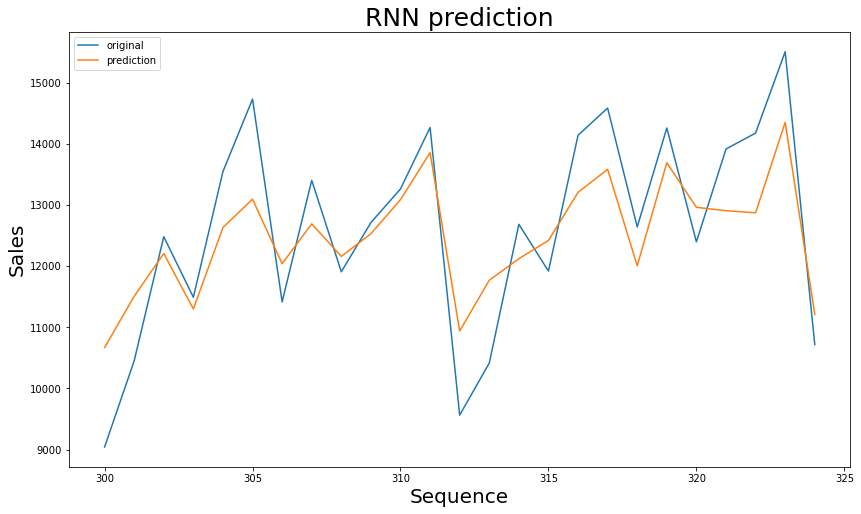

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 32ms/step - loss: 0.0419 - mae: 0.1783


[0.04191916808485985, 0.17826305329799652]